# Nonlinear Evolution of Cylindrical Gravitational Waves Celestino et al
##  Geoff Cope
##  Univeristy of Utah
##  December 31, 2021

Here we concentrate on metric 1 which is the Jordan Kompaneets metric in null coordinates

https://arxiv.org/abs/1511.02479

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u, rho, phi, z, du, drho, dphi, dz = symbols( 'u rho phi z du drho dphi dz' ) 

In [5]:
psi = Function('psi')(u,rho)
psi

In [6]:
omega = Function('omega')(u,rho)
omega

In [7]:
gamma = Function('gamma')(u,rho)
gamma

In [8]:
variables = Matrix( [u,rho,phi,z] )
variables

⎡u⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [9]:
differentials = Matrix( [du,drho,dphi,dz] ) 
differentials

⎡ du ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [11]:
lineElement = expand( -exp(2*(gamma-psi)) * (du**2 + 2*du*drho) + exp(2*psi) * (dz + omega * dphi)**2 + rho**2 * exp(-2*psi) * dphi**2 ) 
lineElement

In [12]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅γ(u, ρ)  -2⋅ψ(u, ρ)    2⋅γ(u, ρ)  -2⋅ψ(u, ρ)                                           
⎢-ℯ         ⋅ℯ            -ℯ         ⋅ℯ                             0                       
⎢                                                                                           
⎢  2⋅γ(u, ρ)  -2⋅ψ(u, ρ)                                                                    
⎢-ℯ         ⋅ℯ                       0                              0                       
⎢                                                                                           
⎢                                                   2  -2⋅ψ(u, ρ)    2        2⋅ψ(u, ρ)     
⎢           0                        0             ρ ⋅ℯ           + ω (u, ρ)⋅ℯ           ω(u
⎢                                                                                           
⎢                                                                    2⋅ψ(u, ρ)              
⎣           0                        0                      ω(u, ρ)⋅ℯ 

In [13]:
import sympy

In [14]:
m = sympy.Array(g)
m

⎡  2⋅γ(u, ρ)  -2⋅ψ(u, ρ)    2⋅γ(u, ρ)  -2⋅ψ(u, ρ)                                           
⎢-ℯ         ⋅ℯ            -ℯ         ⋅ℯ                             0                       
⎢                                                                                           
⎢  2⋅γ(u, ρ)  -2⋅ψ(u, ρ)                                                                    
⎢-ℯ         ⋅ℯ                       0                              0                       
⎢                                                                                           
⎢                                                   2  -2⋅ψ(u, ρ)    2        2⋅ψ(u, ρ)     
⎢           0                        0             ρ ⋅ℯ           + ω (u, ρ)⋅ℯ           ω(u
⎢                                                                                           
⎢                                                                    2⋅ψ(u, ρ)              
⎣           0                        0                      ω(u, ρ)⋅ℯ 

In [15]:
from einsteinpy.symbolic import *

In [17]:
syms = sympy.symbols("u rho phi z")
u,rho,phi,z = syms

In [18]:
metric = MetricTensor(m,syms)

In [19]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢⎡ ⎛   2⋅γ(u, ρ)  -2⋅ψ(u, ρ) ∂                2⋅γ(u, ρ)  -2⋅ψ(u, ρ) ∂                2⋅γ(u, 
⎢⎢-⎜2⋅ℯ         ⋅ℯ          ⋅──(γ(u, ρ)) - 4⋅ℯ         ⋅ℯ          ⋅──(γ(u, ρ)) - 2⋅ℯ       
⎢⎢ ⎝                         ∂ρ                                     ∂u                      
⎢⎢──────────────────────────────────────────────────────────────────────────────────────────
⎢⎢                                                                                         2
⎢⎢                                                                                          
⎢⎢                                                                    

In [20]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                                                                         ∂ 
⎢    2              2                           2        2                  2             ──
⎢   ∂              ∂               ⎛∂          ⎞        ∂                  ∂              ∂ρ
⎢  ───(γ(u, ρ)) - ───(ψ(u, ρ)) - 2⋅⎜──(ψ(u, ρ))⎟  - 2⋅─────(γ(u, ρ)) + 2⋅─────(ψ(u, ρ)) + ──
⎢    2              2              ⎝∂u         ⎠      ∂u ∂ρ              ∂u ∂ρ              
⎢  ∂ρ             ∂ρ                                                                        
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢  2                                          2                 2     

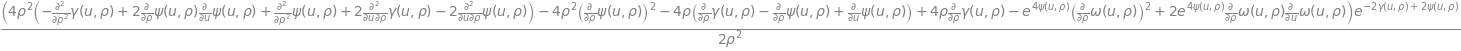

In [21]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [22]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                         ∂ 
⎢    2              2                           2        2                  2             ──
⎢   ∂              ∂               ⎛∂          ⎞        ∂                  ∂              ∂ρ
⎢  ───(γ(u, ρ)) - ───(ψ(u, ρ)) - 2⋅⎜──(ψ(u, ρ))⎟  - 2⋅─────(γ(u, ρ)) + 2⋅─────(ψ(u, ρ)) + ──
⎢    2              2              ⎝∂u         ⎠      ∂u ∂ρ              ∂u ∂ρ              
⎢  ∂ρ             ∂ρ                                                                        
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [23]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [24]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [32]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                                                           
⎢                                                                          ∂             ∂  
⎢               2                                                  2   1.0⋅──(γ(u, ρ))   ──(
⎢  ⎛∂          ⎞        ∂           ∂                 ⎛∂          ⎞        ∂ρ            ∂u 
⎢- ⎜──(ψ(u, ρ))⎟  + 2.0⋅──(ψ(u, ρ))⋅──(ψ(u, ρ)) - 2.0⋅⎜──(ψ(u, ρ))⎟  + ─────────────── - ───
⎢  ⎝∂ρ         ⎠        ∂ρ          ∂u                ⎝∂u         ⎠           ρ             
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [26]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                                                                           
⎢                                                                                         ∂ 
⎢    2              2                           2        2                  2             ──
⎢   ∂              ∂               ⎛∂          ⎞        ∂                  ∂              ∂ρ
⎢  ───(γ(u, ρ)) - ───(ψ(u, ρ)) - 2⋅⎜──(ψ(u, ρ))⎟  - 2⋅─────(γ(u, ρ)) + 2⋅─────(ψ(u, ρ)) + ──
⎢    2              2              ⎝∂u         ⎠      ∂u ∂ρ              ∂u ∂ρ              
⎢  ∂ρ             ∂ρ                                                                        
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢  2                                          2                 2     

In [29]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                                                                           
⎢                                                                                         ∂ 
⎢    2              2                           2        2                  2             ──
⎢   ∂              ∂               ⎛∂          ⎞        ∂                  ∂              ∂ρ
⎢  ───(γ(u, ρ)) - ───(ψ(u, ρ)) - 2⋅⎜──(ψ(u, ρ))⎟  - 2⋅─────(γ(u, ρ)) + 2⋅─────(ψ(u, ρ)) + ──
⎢    2              2              ⎝∂u         ⎠      ∂u ∂ρ              ∂u ∂ρ              
⎢  ∂ρ             ∂ρ                                                                        
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢  2                                          2                 2     

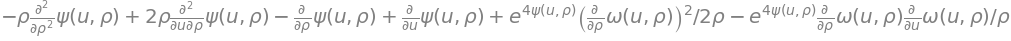

In [74]:
equation2 = expand((1/rho)*ricciSimplified[3,3].args[1]) 
equation2

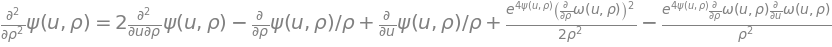

In [81]:
d2psidrho2 = Eq(diff(psi,rho,rho) , expand( solve( equation2 , diff(psi,rho,rho) )[0] ) )
d2psidrho2

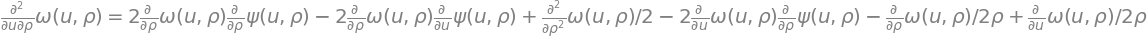

In [85]:
equation3 = Eq( diff(omega,u,rho) , simplify( solve( ricciSimplified[2,3].args[1] , diff(omega,u,rho) )[0].subs(d2psidrho2.args[0],d2psidrho2.args[1]) ) )
equation3

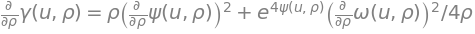

In [46]:
equation4 = Eq( diff(gamma,rho) , solve( ricciSimplified[1,1] , diff(gamma,rho) )[0] ) 
equation4 

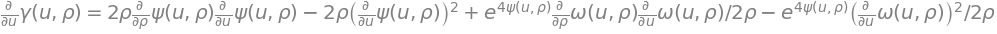

In [45]:
equation5 = Eq( diff(gamma,u) , expand( solve( expand( simplify( ricciSimplified[0,0] - ricciSimplified[1,0] ) ) , diff(gamma,u) )[0]  ) )
equation5 

In [87]:
vacuumFieldEquations = Matrix([equation2,equation3,equation4,equation5])
vacuumFieldEquations

⎡                                                                                           
⎢                                                                          4⋅ψ(u, ρ) ⎛∂     
⎢           2                   2                                         ℯ         ⋅⎜──(ω(u
⎢          ∂                   ∂              ∂             ∂                        ⎝∂ρ    
⎢     - ρ⋅───(ψ(u, ρ)) + 2⋅ρ⋅─────(ψ(u, ρ)) - ──(ψ(u, ρ)) + ──(ψ(u, ρ)) + ──────────────────
⎢           2                ∂u ∂ρ            ∂ρ            ∂u                       2⋅ρ    
⎢         ∂ρ                                                                                
⎢                                                                                           
⎢                                                                           2               
⎢                                                                          ∂                
⎢                                                                     